# Przetwarzanie Grafiki i Muzyki - laboratorium nr 12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

## Zadanie 1 (2 punkty)

W zadaniu tym będziemy rozważać sygnały w postaci $g\left(t\right) = A\cdot \sin\left( 2\pi\cdot f \cdot t + \phi \right)$,
gdzie $A>0$ jest amplitudą sygnału, $f$ jest częstotliwością, a $\phi$ jest przesunięciem fazowym. Ponadto rozważać będziemy $t\in [0,1]$. Proszę wygenerować dziedzinę czasu jako
```
t = np.linspace(0, 1, 0.001)
```
Ujednolicenie dziedziny czasu będzie przydatne w zadaniu nr 3, kiedy będziemy musieli analizować PSD. Następnie:
  * Wygeneruj i narysuj sygnał o:
    * amplitudzie jeden (A = 1),
    * zerowym przesunięciu w fazie (phi = 0),
    * częstotliwości 25 Hz.
  * Wygeneruj i narysuj sygnał o:
    * amplitudzie jeden (A = 1),
    * zerowym przesunięciu w fazie (phi = 0),
    * częstotliwości 40 Hz.
  * Wygeneruj i narysuj sygnał będący sumą powyższych.

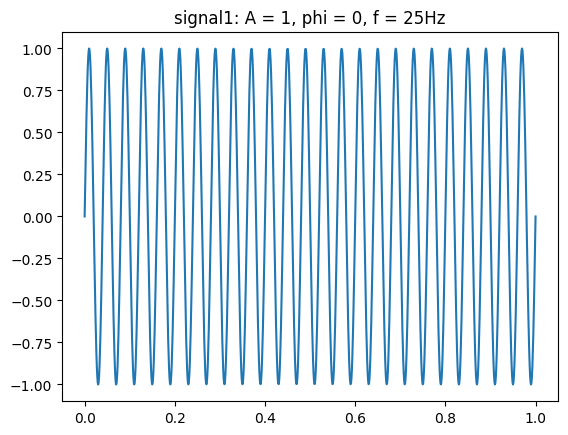

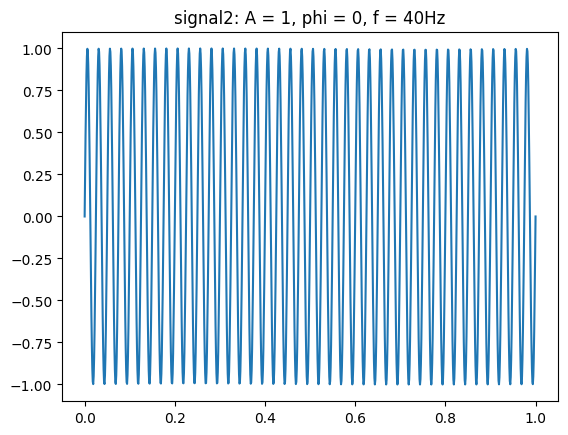

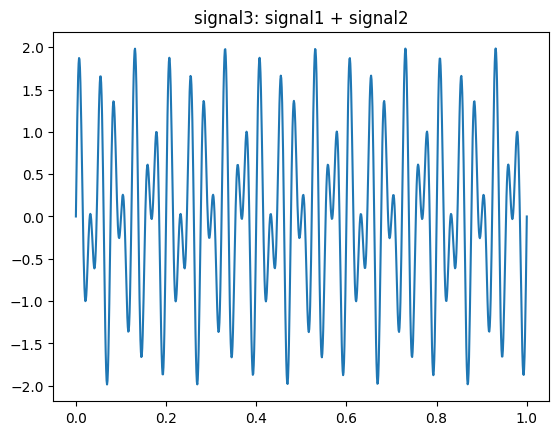

In [4]:
t = np.linspace(0, 1, 1000)

def get_sinus(A, phi, f):
    return A * np.sin(2 * np.pi * f * t + phi)

plt.figure()
plt.title('signal1: A = 1, phi = 0, f = 25Hz')
plt.plot(t, get_sinus(1, 0, 25))
plt.figure()
plt.title('signal2: A = 1, phi = 0, f = 40Hz')
plt.plot(t, get_sinus(1, 0, 40))
signal3 = get_sinus(1, 0, 25) + get_sinus(1, 0, 40)
plt.figure()
plt.title('signal3: signal1 + signal2')
plt.plot(t, signal3)

## Zadanie 2 (4 punkty)
Proszę wziąć sumę sygnałów z poprzedniego zadania, a następnie:
* Dokonać na niej FFT (Fast Fourier Transform) i narysować wykres w dziedzinie częstotliwości (proszę pamiętać, że FFT może mieć wartości zespolone, stąd potrzeba wzięcia modułu). (2 punkty)
* Dokonać IFFT (Inverse Fast Fourier Transorm) na sygnale przekształconym przez FFT i porównać oryginalny sygnał (przed FFT) z sygnałem otrzymanym po zaaplikowaniu IFFT. (2 punkty)

<Figure size 640x480 with 0 Axes>

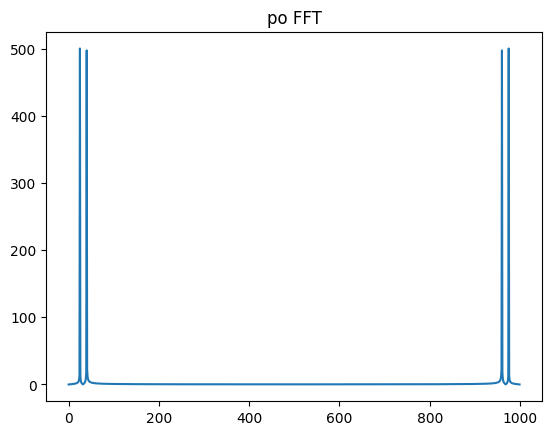

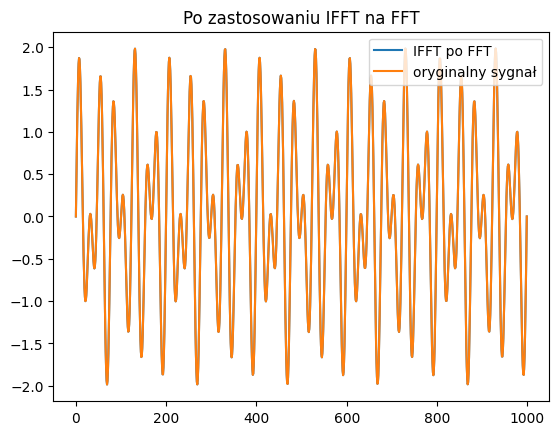

<Figure size 640x480 with 0 Axes>

In [22]:
signal_after_fft = fft(signal3)

plt.figure()
plt.title('po FFT')
plt.plot(np.abs(signal_after_fft))

signal_after_ifft = ifft(signal_after_fft)

plt.figure()
plt.title('Po zastosowaniu IFFT na FFT')
plt.plot(signal_after_ifft, label='IFFT po FFT')
plt.plot(signal3, label='oryginalny sygnał')
plt.legend()
plt.figure()

## Zadanie 3 (4 punkty)

Proszę wziąć sygnał z pierwszego zadania i dodać do niego szum gaussowski $\mathcal{N}\left(0,1\right)$, a następnie:
1) Dokonaj FFT na tym sygnale. (1 punkt)
2) Porównaj wykres transformaty Fouriera (z szumem Gaussa) z transformatą Fouriera sygnału niezaszumionego. Wystarczy narysować te dwa wykresy obok siebie. (1 punkt)
3) Prostym progowaniem usuń szum z transformaty Fouriera - w tym celu proszę przenalizować PSD (Power Spectral Density) i wybrać sensowny próg (uzasadnić wybór!), a następnie wyznaczyć nowe współczynniki, korzystając ze wzoru:
$$
\hat{f}\left(\omega_k\right) = \begin{cases}
                                0, & PSD\left(\omega_k\right) \leq T ,  \\
                                \hat{f}\left(\omega_k\right), & PSD\left(\omega_k\right) > T.
                            \end{cases}
$$ (1 punkt)
4) Dokonaj IFFT, uwzględniając współczynniki z punktu nr 3, i policz MSE pomiędzy sygnałem oryginalnym a sygnałem odszumionym. (1 punkt)

HINT:
$$
PSD\left(\omega_k\right) = \frac{|\hat{f}\left(\omega_k\right)|^2}{n},
$$
gdzie $\hat{f}\left(\omega_k\right) = \sum_{j=0}^{n-1}f_j\cdot e^{-i\cdot 2\pi j \omega_k}$, $i$ jest jednostką urojoną, $f_j$ to $j$-ta wartość wygnału, a $n$ jest liczbą próbek. Z racji tego, że dziedzina czasu $t$ została wygenerowana jako ```t = np.linspace(0, 1, 0.001)```, to $\omega_k = \frac{k}{0.001\cdot n}$, gdzie $k\in\lbrace 0, 1, \ldots, n-1\rbrace$.

MSE = 1.7868139475641183


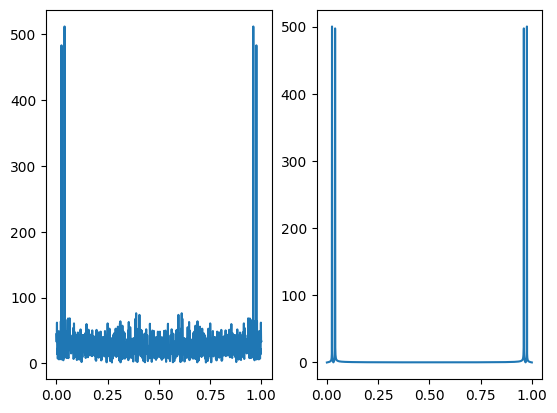

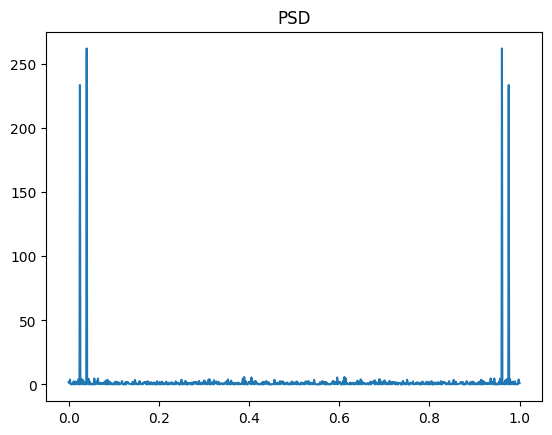

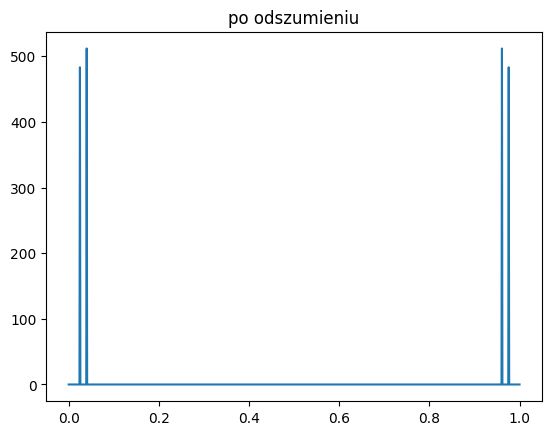

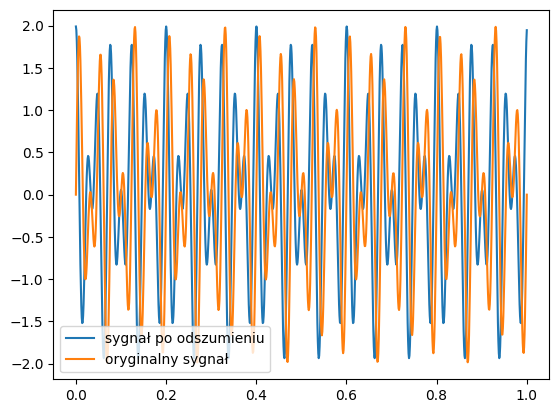

In [46]:
with_gauss_noise = signal3 + np.random.normal(0, 1, signal3.shape)

fourier_noise = np.abs(fft(with_gauss_noise))
fourier_no_noise = np.abs(fft(signal3))

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(t, fourier_noise)
axes[1].plot(t, fourier_no_noise)

PSD = np.square(np.abs(fourier_noise))/1000
plt.figure()
plt.title('PSD')
plt.plot(t, PSD)
#z wykresu jasno widać 4 duże wartości PSD (2 blisko 0.0 i 2 blisko 1.0), oraz całą masę mniejszych wartości (znacznie poniżej 10, które wydają się być szumem. Jako, że istotne wartości wydają się mieć wartości ok. 300, a szum wartości PSD mniejesze niż 10, liczba 10 wydaje się być dobrym progiem do odszumiania w tym przypadku)

fourier_noise_removed = fourier_noise.copy()
fourier_noise_removed[PSD <= 10] = 0

plt.figure()
plt.title('po odszumieniu')
plt.plot(t, fourier_noise_removed)

signal_noise_removed = ifft(fourier_noise_removed)
plt.figure()
plt.plot(t, signal_noise_removed, label='sygnał po odszumieniu')
plt.plot(t, signal3, label='oryginalny sygnał')
plt.legend()

mse = (np.square(signal_noise_removed.real - signal3)).mean()
print(f'MSE = {mse}')